In [1]:
import os
import re
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['font.family'] = ['DeJavu Serif']
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
subdir=[]
dir='/home/cadeniran/u1/amphiscan-pep-spin/long'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    subdir.append(dir)
subdir.sort()

In [4]:
proteinlist=[]
dir='/home/cadeniran/u1/amphiscan-pep-spin/results.1'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    proteinlist.append(dir)
proteinlist.sort()

## Loading in data

In [5]:
myDict = {}
for item in subdir:
    myDict[item] = []
    os.chdir("/home/cadeniran/u1/amphiscan-pep-spin/long/"+item)
    for protein in proteinlist:
        pdb = protein.split(sep='_')[0]
        let = protein.split(sep='_')[1]
        scoreFile = ('results/{}_{}/txt/{}_{}_renum_best_scores.txt'.format(pdb,let,pdb,let))
        regexp = re.compile(r'Time elapsed for completion: .*?([0-9.-]+)')
        with open(scoreFile) as f:
            for line in f:
                match = regexp.match(line)
                if match:
                    seconds = float(match.group(1))
                    myDict[item].append(seconds)
                    break

## Formatting data for plots

In [6]:
bars = subdir
height = []

for item in subdir:
    height.append(np.mean(myDict[item]) / 60)
y_pos = np.arange(len(bars))

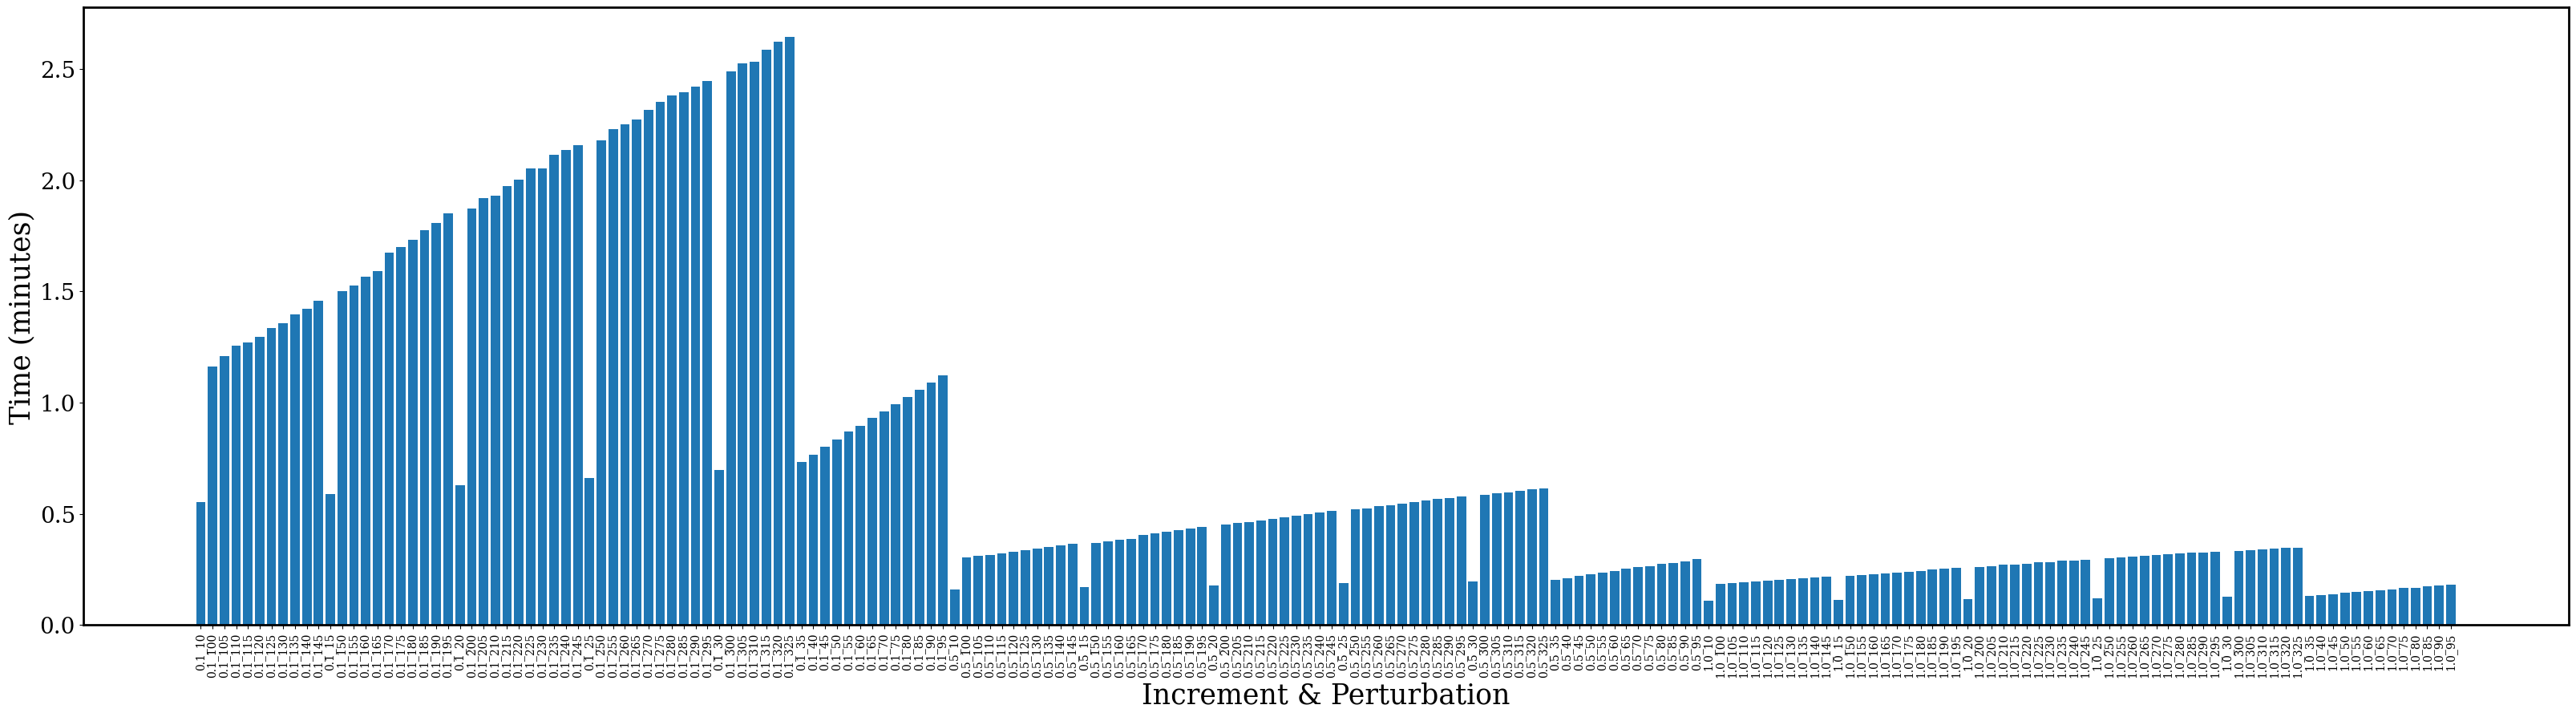

In [10]:
plt.rcParams['figure.figsize'] = 40,10
plt.bar(y_pos, height)
plt.yticks(fontsize=20)
plt.xticks(y_pos, bars, rotation=90)
plt.ylabel("Time (minutes)", fontsize=25)
plt.xlabel("Increment & Perturbation", fontsize=25)

#plt.show()
plt.savefig("/home/cadeniran/ipn/figs/barplot.png", bbox_inches='tight')